# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [77]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [78]:
# Start by cleaning the data.
# Identify any null or missing data, and impute appropriate replacement values.

# check for missing data
df_flights.isnull().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [79]:
# column DepDel15 has 2761 missing values

# Since DepDel15 is derived from DepDelay, use it to get missing values
df_flights.DepDel15 = df_flights.DepDel15.fillna( df_flights.DepDelay >= 15 )

# check to see if mising data has been filled
df_flights.isnull().sum()



Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



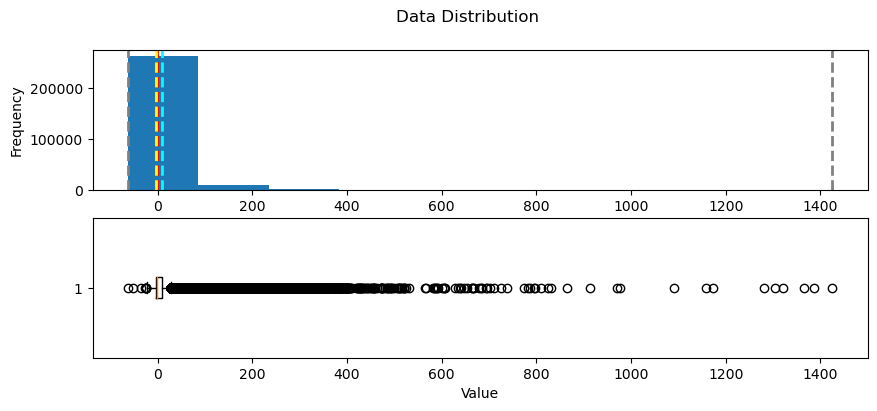

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



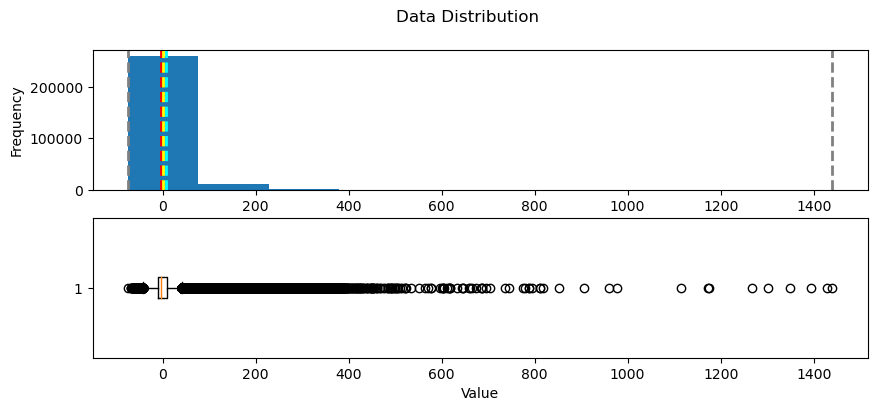

In [80]:
# Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

from matplotlib import pyplot as plt

# Borrow tutorial function for showing box plot and histogram
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()

# Look at DepDelay for outliers
show_distribution(df_flights['DepDelay'])

# Look at DepDelay for outliers
show_distribution(df_flights['ArrDelay'])


Minimum:-32.00
Mean:-2.66
Median:-4.00
Mode:0.00
Maximum:37.00



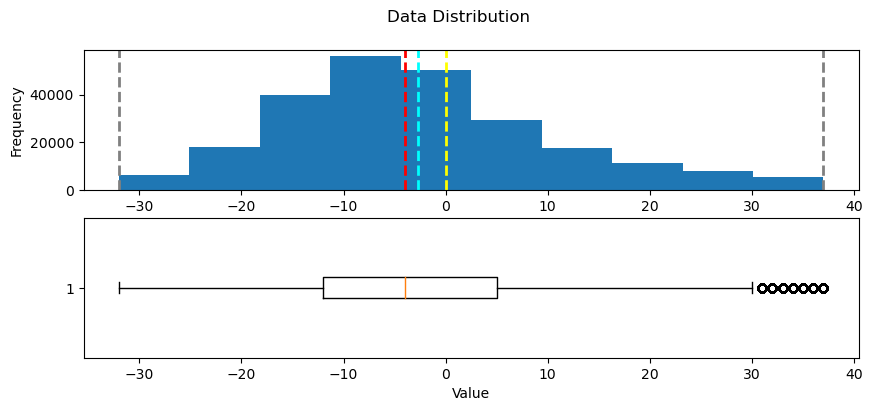

In [81]:
# Many outliers on the right, some on the left.
# Use 0.01th percentile and 0.90th percentile to try exclude them
ArrDelay_q01 = df_flights.ArrDelay.quantile(0.01)
ArrDelay_q90 = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[ df_flights.ArrDelay > ArrDelay_q01 ]
df_flights = df_flights[ df_flights.ArrDelay < ArrDelay_q90 ]

# Look again at ArrDelay for outliers
show_distribution(df_flights['ArrDelay'])

Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00



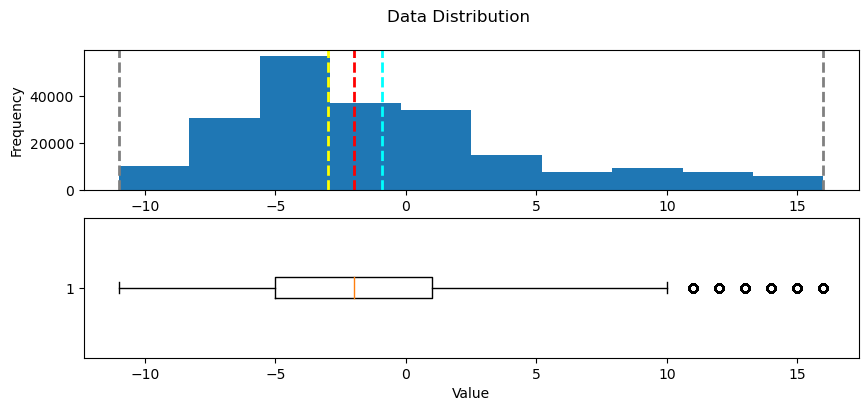

In [82]:
# Many outliers on the right, some on the left.
# Use 0.01th percentile and 0.90th percentile to try exclude them
DepDelay_q01 = df_flights.DepDelay.quantile(0.01)
DepDelay_q90 = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[ df_flights.DepDelay > DepDelay_q01 ]
df_flights = df_flights[ df_flights.DepDelay < DepDelay_q90 ]

# Look again at DepDelay for outliers
show_distribution(df_flights['DepDelay'])

In [83]:
# Explore the cleaned data.

# View summary statistics for the numeric fields in the dataset.
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,2359.000000,37.000000,1.000000,1.000000


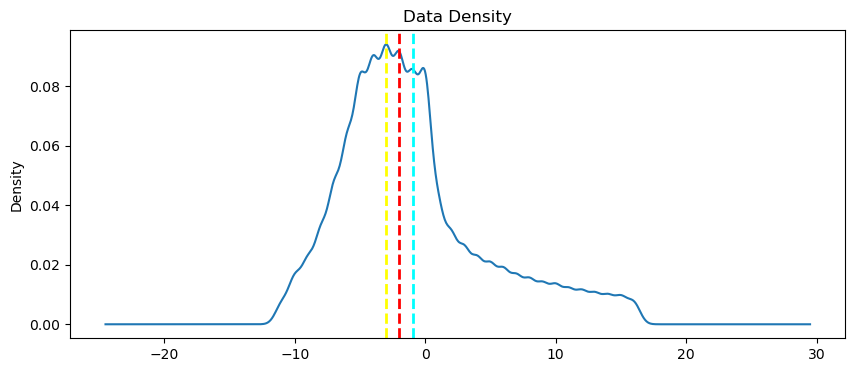

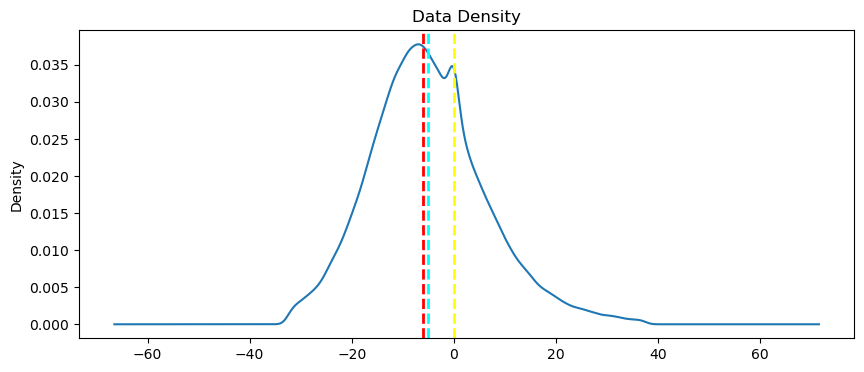

In [84]:
# Determine the distribution of the DepDelay and ArrDelay columns.

# use tutorial function for showing data density
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(df_flights["DepDelay"])
show_density(df_flights["ArrDelay"])

In [85]:
# DepDelay is right skewed
# ArrDelay is normal? bi-modal?

In [86]:
# Use statistics, aggregate functions, and visualizations to answer the following questions:
# What are the average (mean) departure and arrival delays?

df_flights[ ["DepDelay", "ArrDelay"] ].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

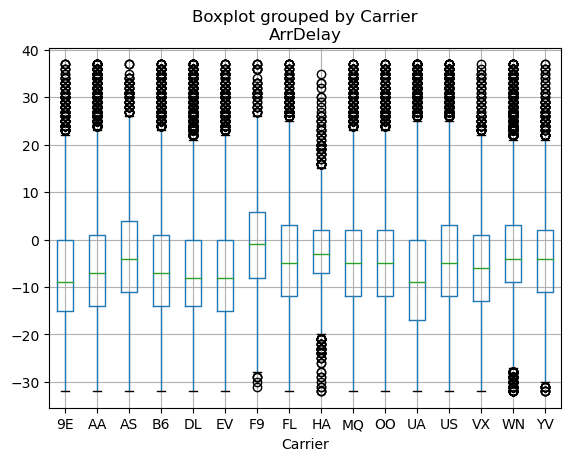

In [87]:
# How do the carriers compare in terms of arrival delay performance?
df_flights.boxplot( column="ArrDelay", by="Carrier" )

# F9 tends to have longer delays than other carriers

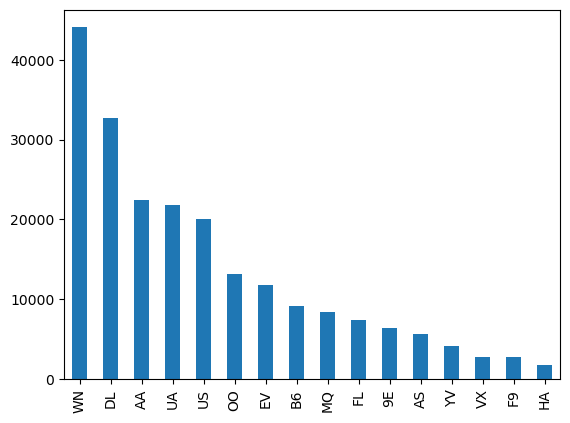

In [88]:
df_flights['Carrier'].value_counts().plot.bar()

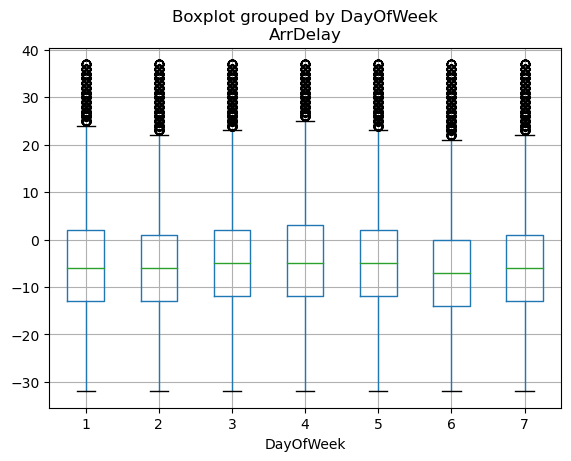

In [89]:
# Is there a noticable difference in arrival delays for different days of the week?
df_flights.boxplot( column="ArrDelay", by="DayOfWeek" )

# No


In [90]:
# Which departure airport has the highest average departure delay?

# df_flights["OriginAirportName"].unique()
departure_delay_by_airport = df_flights.groupby( ['OriginAirportName'] ).mean()['DepDelay'].sort_values()
departure_delay_by_airport
# Chicago Midway International 

OriginAirportName
Long Beach Airport                    -3.447844
Richmond International                -3.198073
Ted Stevens Anchorage International   -3.149758
Tucson International                  -2.989154
Memphis International                 -2.962737
                                         ...   
Denver International                   0.807272
Metropolitan Oakland International     0.964853
William P Hobby                        1.561927
Dallas Love Field                      2.148798
Chicago Midway International           2.365960
Name: DepDelay, Length: 70, dtype: float64

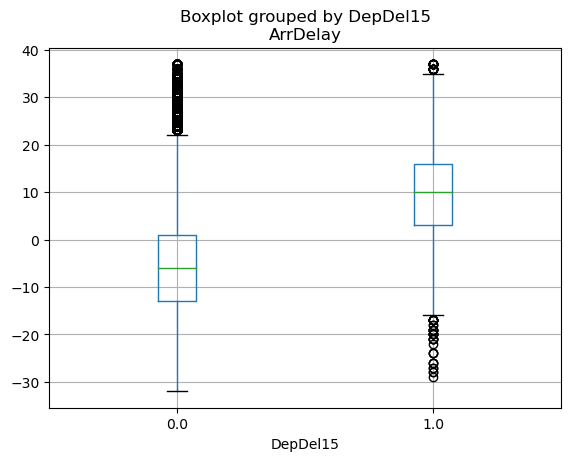

In [91]:
# Do late departures tend to result in longer arrival delays than on-time departures?

df_flights.boxplot( column="ArrDelay", by="DepDel15" )

# Yes

In [92]:
# Which route (from origin airport to destination airport) has the most late arrivals?

# new series to get routes
flight_routes = pd.Series( df_flights['OriginAirportName'] + " to " + df_flights['DestAirportName'] )
# concat routes to dataframe
df_flights = pd.concat( [ df_flights, flight_routes.rename("Route") ], axis=1 )


In [93]:
late_flights = df_flights[ df_flights['ArrDel15'] == 1 ]

late_flights['Route'].value_counts()

# San Francisco International to Los Angeles International 

San Francisco International to Los Angeles International             90
Los Angeles International to San Francisco International             69
LaGuardia to Hartsfield-Jackson Atlanta International                68
Los Angeles International to John F. Kennedy International           52
LaGuardia to Charlotte Douglas International                         51
                                                                     ..
McCarran International to Fort Lauderdale-Hollywood International     1
Ontario International to George Bush Intercontinental/Houston         1
Ted Stevens Anchorage International to Long Beach Airport             1
Phoenix Sky Harbor International to Nashville International           1
Norfolk International to Nashville International                      1
Name: Route, Length: 2116, dtype: int64

In [94]:
# Which route has the highest average arrival delay?
arrival_delay_by_airport = df_flights.groupby( ['Route'] ).mean()['ArrDelay'].sort_values()
arrival_delay_by_airport

# Louis Armstrong New Orleans International to Ronald Reagan Washington National

Route
Indianapolis International to Logan International                                -26.000000
Jacksonville International to Chicago Midway International                       -24.125000
Denver International to Kahului Airport                                          -22.666667
Eppley Airfield to LaGuardia                                                     -20.750000
Lambert-St. Louis International to Cleveland-Hopkins International               -20.000000
                                                                                    ...    
Memphis International to Denver International                                      9.758621
Cleveland-Hopkins International to Philadelphia International                     12.800000
John F. Kennedy International to Louisville International-Standiford Field        18.000000
Cleveland-Hopkins International to Palm Beach International                       18.000000
Louis Armstrong New Orleans International to Ronald Reagan Washington Nati